In [1]:
import random
import numpy as np
import matplotlib.pyplot as plt


In [16]:
def estimate_pi(num_samples, show_plot=False):
    """ Estima el valor de π usando el método de Montecarlo """
    x = np.random.uniform(-1, 1, num_samples)
    y = np.random.uniform(-1, 1, num_samples)
    inside_circle = x**2 + y**2 <= 1
    pi_estimate = 4 * np.sum(inside_circle) / num_samples
    
    if show_plot:
        plt.figure(figsize=(6,6))
        plt.scatter(x[inside_circle], y[inside_circle], color='blue', s=1, label="Dentro del círculo")
        plt.scatter(x[~inside_circle], y[~inside_circle], color='red', s=1, label="Fuera del círculo")
    
        circle = plt.Circle((0, 0), 1, color='black', fill=False, linewidth=2)  # Aumentamos grosor del círculo
        plt.gca().add_patch(circle)
    
        # Configuración del gráfico
        plt.xlim(-1, 1)
        plt.ylim(-1, 1)
        plt.gca().set_aspect('equal')
        plt.axhline(0, color='gray', linewidth=0.5)
        plt.axvline(0, color='gray', linewidth=0.5)
        plt.title(f"Estimación de π: {pi_estimate:.5f} con {num_samples} puntos")
        plt.show()
    
    return pi_estimate
    

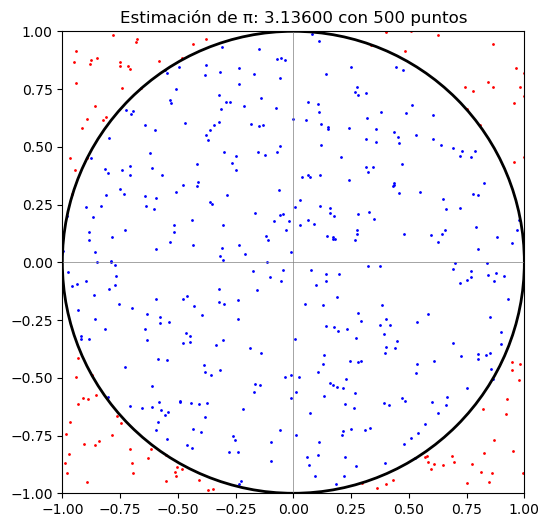

3.136

In [45]:
estimate_pi(500, True)

In [80]:
sample_sizes = np.logspace(2, 6, num=20, dtype=int)

In [101]:
pi_estimates = []
for n in sample_sizes:
 pi_estimate = estimate_pi(n, show_plot=False) 



In [99]:
num_trials = 100

In [114]:
pi_estimates = []
uncertainties = []

true_pi = np.pi

for sample_size in sample_sizes:
    pi_estimates_for_trials = []
    
    for _ in range(num_trials):
        pi_estimate = estimate_pi(sample_size, show_plot=False)
        pi_estimates_for_trials.append(pi_estimate)
    
    pi_estimates_for_trials = np.array(pi_estimates_for_trials)
    pi_estimates.append(np.mean(pi_estimates_for_trials))
    uncertainty = np.std(pi_estimates_for_trials)
    uncertainties.append(uncertainty)

pi_estimates = np.array(pi_estimates)
uncertainties = np.array(uncertainties)

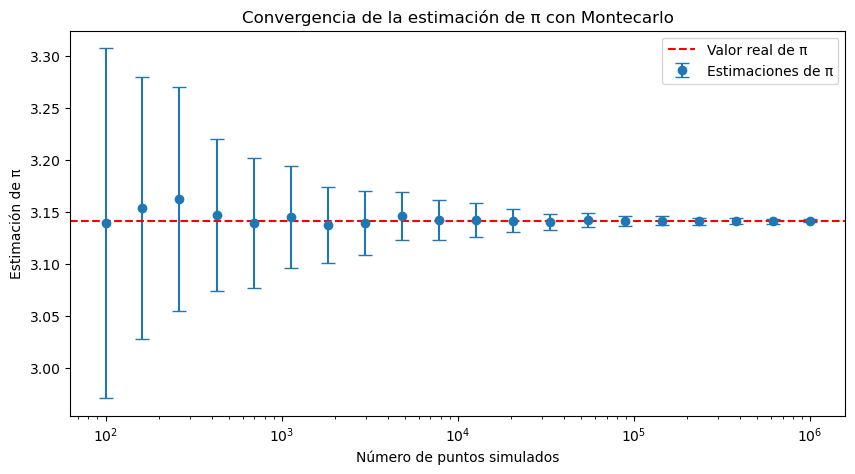

In [115]:
plt.figure(figsize=(10, 5))
plt.errorbar(sample_sizes, pi_estimates, yerr=uncertainties, fmt='o', capsize=5, label='Estimaciones de π')
plt.axhline(y=np.pi, color='r', linestyle='--', label='Valor real de π')
plt.xscale("log")
plt.xlabel("Número de puntos simulados")
plt.ylabel("Estimación de π")
plt.legend()
plt.title("Convergencia de la estimación de π con Montecarlo")
plt.show()

In [118]:
errors = []

for sample_size in sample_sizes:
    pi_estimate = estimate_pi(sample_size, show_plot=False)
    error = abs(pi_estimate - np.pi)
    errors.append(error)

errors = np.array(errors)

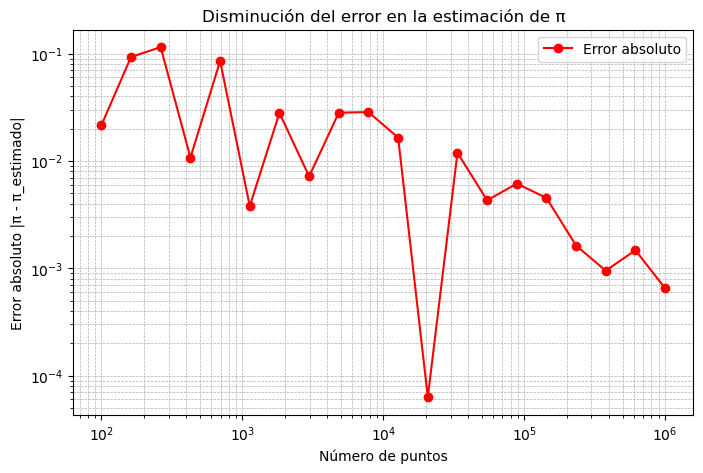

In [120]:
plt.figure(figsize=(8, 5))
plt.plot(sample_sizes, errors, marker='o', linestyle='-', color='red', label="Error absoluto")
plt.xscale('log')  # Escala logarítmica para mejor visualización
plt.yscale('log')
plt.xlabel("Número de puntos")
plt.ylabel("Error absoluto |π - π_estimado|")
plt.title("Disminución del error en la estimación de π")
plt.axhline(0, color="black", linewidth=1, linestyle="--")
plt.legend()
plt.grid(True, which="both", linestyle="--", linewidth=0.5)
plt.show()